In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Set the random seed for reproducibility

from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

<h3>Create a DataFrame out of the Crypto Punk historical data

In [3]:
file_path = Path('~/Downloads/chart.csv')
punks_df = pd.read_csv(file_path, index_col= "Date", infer_datetime_format=True, parse_dates=True,)
punks_df.head()
punks_df.dropna(inplace=True)


In [4]:
punks_df

,Average USD
Date,
2017-06-23,53.70
2017-06-24,56.53
2017-06-25,52.43
2017-06-26,47.81
2017-06-27,52.96
...,...
2021-12-05,88463.56
2021-12-06,88925.25
2021-12-07,89066.04


 <h3> Here we want to establish the window (of time) size to evaluate the data

In [5]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

<h2> Set the parameters for the window function to accept

In [6]:
# Define the window size - may be adjusted to improve model
window_size = 30 

# Set the index of the feature and target columns
feature_column = 0
target_column = 0

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(punks_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[ 53.7   56.53  52.43  47.81  52.96  56.9   57.05  59.98  73.79  76.76
   89.3  115.   114.32 126.36 132.35 130.63 129.28 135.16 134.96 133.97
  136.05 135.15 134.92 134.77 136.13 134.2  133.06 132.39 131.43 130.47]
 [ 56.53  52.43  47.81  52.96  56.9   57.05  59.98  73.79  76.76  89.3
  115.   114.32 126.36 132.35 130.63 129.28 135.16 134.96 133.97 136.05
  135.15 134.92 134.77 136.13 134.2  133.06 132.39 131.43 130.47 129.94]
 [ 52.43  47.81  52.96  56.9   57.05  59.98  73.79  76.76  89.3  115.
  114.32 126.36 132.35 130.63 129.28 135.16 134.96 133.97 136.05 135.15
  134.92 134.77 136.13 134.2  133.06 132.39 131.43 130.47 129.94 128.78]] 

y sample values:
[[129.94]
 [128.78]
 [129.82]]


<h3> Split the data between training and testing data to evaluate the efficacy of the model

In [7]:
# Manually splitting the data
split = int(0.95 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

<h3>Scale the training and testing data creating an Apples to Apples method of comparing the time series data.

In [8]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

<h3>Match the shape of the data for the training and test data

In [9]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[1.38125434e-04]
  [2.02760001e-04]
  [1.06587057e-04]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [2.07039885e-05]
  [1.00527180e-05]
  [1.95083046e-04]
  [2.85315812e-04]
  [2.55759297e-04]
  [2.34611704e-04]
  [3.21803658e-04]
  [3.17364488e-04]
  [3.02183746e-04]
  [3.32739121e-04]
  [3.18621750e-04]
  [3.13063837e-04]
  [3.10194308e-04]
  [3.29463772e-04]
  [3.00768843e-04]
  [2.82988440e-04]
  [2.67232423e-04]
  [2.53067337e-04]
  [2.39347164e-04]]

 [[2.04491304e-04]
  [1.07425597e-04]
  [0.00000000e+00]
  [1.07857379e-04]
  [7.95041363e-05]
  [2.96404788e-06]
  [5.71039452e-05]
  [2.54599053e-04]
  [4.85944267e-05]
  [1.98159456e-04]
  [4.02446940e-04]
  [1.01184906e-05]
  [1.96259987e-04]
  [2.87167164e-04]
  [2.59044763e-04]
  [2.35401098e-04]
  [3.22985620e-04]
  [3.18808742e-04]
  [3.02606816e-04]
  [3.33146416e-04]
  [3.19358191e-04]
  [3.1

<h3>Create the layers of the LSTM neural network model

In [10]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.5

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

2021-12-12 22:36:08.330059: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 30, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

<h3> Training the Model

In [14]:
%%time
# Train the model
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=30, verbose=1)

Epoch 1/20
51/51 [==============================] - 4s 17ms/step - loss: 0.0146
Epoch 2/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0132
Epoch 3/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0156
Epoch 4/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0176
Epoch 5/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0057
Epoch 6/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0072
Epoch 7/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0126
Epoch 8/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0037
Epoch 9/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0034
Epoch 10/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0067
Epoch 11/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0052
Epoch 12/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0109
Epoch 13/20
51/51 [==================

<h3>How did the model do? 

In [15]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.004147537052631378

<h2> Use the model to predict the Crypto Punk Prices

In [16]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [17]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [18]:
# Create a DataFrame of Real and Predicted values
nft = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = punks_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
nft.head()

,Actual,Predicted
Date,,
2021-09-20,70568.11,69565.234375
2021-09-21,70699.26,69838.039062
2021-09-22,70832.27,70092.984375
2021-09-23,71146.69,70328.992188
2021-09-24,71632.60,70549.664062


<h3>Visualize the Comparison

<AxesSubplot:title={'center':'Actual Vs. Predicted Crypto Punk Prices'}, xlabel='Date'>

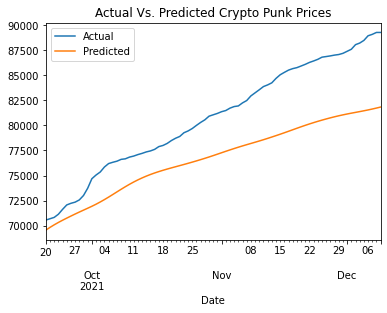

In [19]:
# Plot the real vs predicted prices as a line chart
nft.plot(title="Actual Vs. Predicted Crypto Punk Prices")
